In [80]:
TARGETS = [
    0.5161290323,
    0.7188940092,
    0.8698156682,
    0.9631336406,
    1.0529953917,
    1.133640553,
    1.1993087558,
    1.2523041475,
    1.3214285714,
    1.3536866359,
    1.3859447005,
    1.418202765,
    1.4550691244,
    1.4919354839,
    1.5080645161,
    1.5241935484,
    1.5403225806,
    1.5564516129,
    1.5771889401,
    1.5887096774,
    1.599078341,
    1.6094470046,
    1.6152073733,
    1.6221198157
]

DELTAS = [
    0.5161445829244465,
    0.4997949220914800,
    0.4888900890981265,
    0.4130704994139208,
    0.4253848976635191,
    0.4184687781309460,
    0.3936649202161004,
    0.3588710293244263,
    0.4231553114393557,
    0.2889082972475748,
    0.1702626162506641,
    0.1689796096722179,
    0.1883929096181789,
    0.18962579311684136,
    0.1305896052644996,
    0.11633757757456899,
    0.12243322493106974,
    0.12050860605514514,
    0.12994755220882373,
    0.08640391531140598,
    0.09885577242432499,
    0.10596546947835507,
    0.10847755148571396,
    0.0638920547195091
]

DELTAS_used = [
    0.5162049085865681,
    0.5001617542505696,
    0.4895374321040051,
    0.4133156231642960,
    0.4254929262239113,
    0.4185106291938654,
    0.3936224626324226,
    0.3592021873751825,
    0.4227455362185202,
    0.2889786621257507,
    0.2990803149973352,
    0.2980053411248858,
    0.3278548743792022,
    0.3268537591678519,
    0.2222389153440853,
    0.2147271278862675,
    0.2271812561709724,
    0.2188789204055356,
    0.2534842863405704,
    0.1943563797606358,
    0.1769833979598591,
    0.1811455527733305,
    0.1341968742628301,
    0.1580705552864369,
]

In [81]:
import matplotlib as plot
import numpy

In [82]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

y1 = TARGETS
y2 = DELTAS
y3 = DELTAS_used
x = np.arange(24)

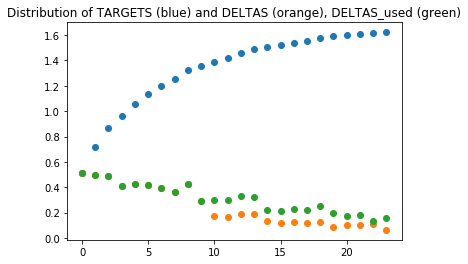

In [83]:
matplotlib.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots()
ax.plot(x,y1, 'o')
ax.plot(x,y2, 'o')
ax.plot(x,y3, 'o')
ax.set_title('Distribution of TARGETS (blue) and DELTAS (orange), DELTAS_used (green)')
plt.show()

# plotting their tau

In [84]:
import random
forecasts = []

for _ in range(1):
        tau = 0
        temp = []
        for i in range(24):
            tau = tau + random.gauss(0, DELTAS[i])
            temp.append(tau)
        forecasts.append(temp)
        

In [85]:
np_fc = np.array(forecasts)

## Generating forecasts in python

Let's look at the generated forecasts in python

In [86]:
import weather_py.forecast_generator as fg
import weather_py.weather_data_extractor as we

#import weather_py.forecast_generator as fg

In [87]:
data_packets = we.download_files(we.weather_file_urls)
all_data = []
for p in data_packets:
    d = we.convert_weather_file(p)
    all_data.extend(d)
    
len(all_data)

['/tmp/tmpqsv8mqp2', '..']  .. 
['/tmp/tmphoxapurz', '..']  .. 


26280

Okay, we got all the data in our `all_data` object. This was the "download and import" part of the previous scripts. Next we need to create our forecasts. But first, let's look at the data for a sec

In [88]:
all_data[0:5]

[[datetime.datetime(2009, 1, 1, 0, 0), 'rotterdam', -1.5, 1.0, 240, 1.0],
 [datetime.datetime(2009, 1, 1, 1, 0), 'rotterdam', -1.2, 1.0, 270, 1.0],
 [datetime.datetime(2009, 1, 1, 2, 0), 'rotterdam', -1.1, 2.0, 240, 1.0],
 [datetime.datetime(2009, 1, 1, 3, 0), 'rotterdam', -1.0, 1.0, 250, 1.0],
 [datetime.datetime(2009, 1, 1, 4, 0), 'rotterdam', -0.9, 1.0, 250, 1.0]]

In [89]:
forecasts = fg.make_forecasts(np.array(all_data[0:1000]))

In [90]:
forecasts[0]

array([list([datetime.datetime(2009, 1, 1, 1, 0), 'rotterdam', 0.8806381307209223, 0.0, 165.0, 0.010331848979608026, datetime.datetime(2009, 1, 1, 0, 0)]),
       list([datetime.datetime(2009, 1, 1, 2, 0), 'rotterdam', 1.2298778353327342, 0.0, 102.0, 0.0, datetime.datetime(2009, 1, 1, 0, 0)]),
       list([datetime.datetime(2009, 1, 1, 3, 0), 'rotterdam', 0.7415015341632649, 0.19358616498208836, 249.0, 0.0, datetime.datetime(2009, 1, 1, 0, 0)]),
       list([datetime.datetime(2009, 1, 1, 4, 0), 'rotterdam', 0.5934633212035303, 0.0, 42.0, 0.0, datetime.datetime(2009, 1, 1, 0, 0)]),
       list([datetime.datetime(2009, 1, 1, 5, 0), 'rotterdam', 1.204074512752698, 0.0, 343.0, 0.0, datetime.datetime(2009, 1, 1, 0, 0)]),
       list([datetime.datetime(2009, 1, 1, 6, 0), 'rotterdam', 1.762652695489041, 0.0, 355.0, 0.0, datetime.datetime(2009, 1, 1, 0, 0)]),
       list([datetime.datetime(2009, 1, 1, 7, 0), 'rotterdam', 0.739101481784787, 0.0, 139.0, 0.0, datetime.datetime(2009, 1, 1, 0, 0)])

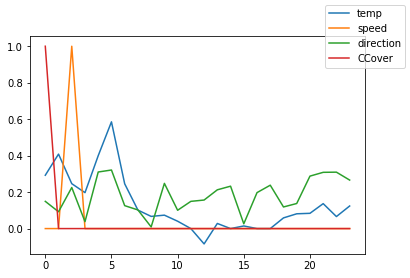

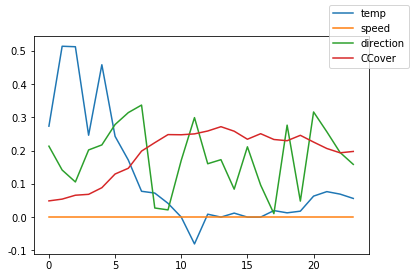

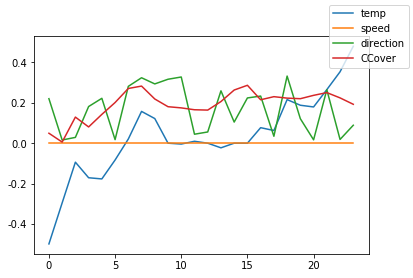

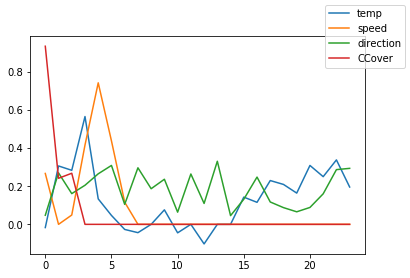

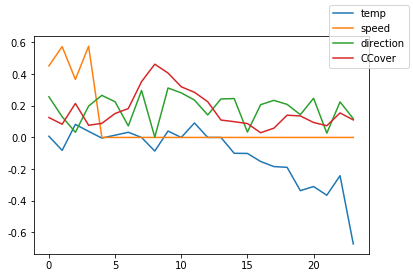

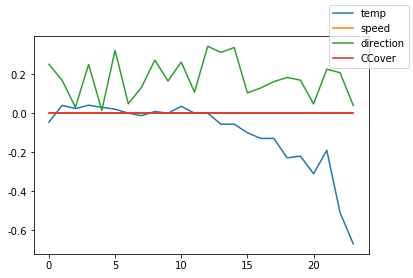

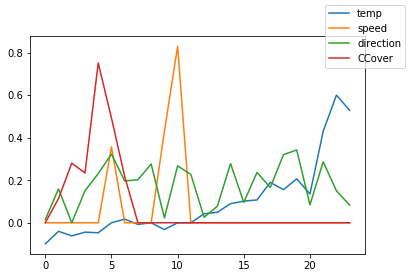

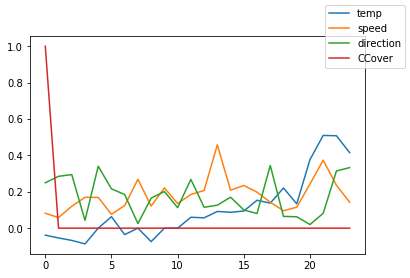

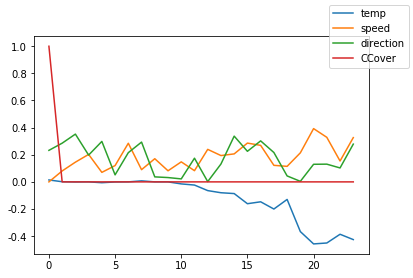

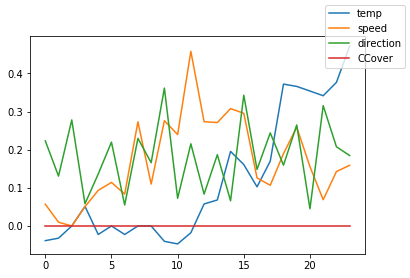

In [91]:
x = range(24)
import sklearn.preprocessing as skpp

#let's look at 10 forecasting instances
for i in range(10):
    fig, ax = plt.subplots()
    fc_instance = forecasts[i]
    
    ys = []
    for j in range(2,6):
        y = [n[:][j] for n in fc_instance]
        ys.append(y)
        
    ys = skpp.normalize(ys)
    ax.plot(x, ys[0], '-', label='temp')
    ax.plot(x, ys[1], '-', label='speed')
    ax.plot(x, ys[2], '-', label='direction')
    ax.plot(x, ys[3], '-', label='CCover')
    fig.legend()
    plt.show()

## Verifying generated forecasts

To verify the forecasts, I can visually use something **like this**

![img](https://i.imgur.com/OLPY0cS.png)


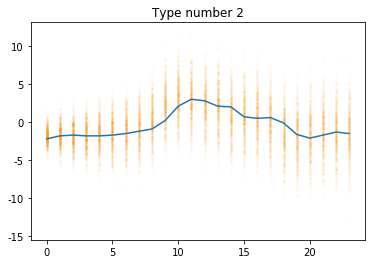

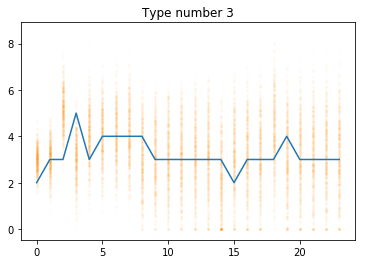

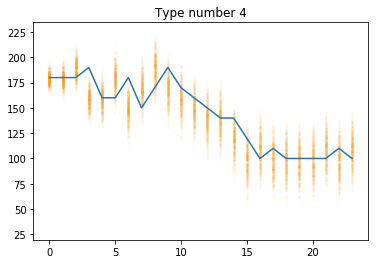

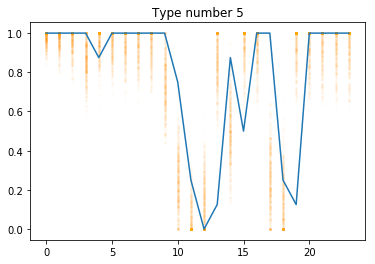

In [172]:
#reimporting libraries as they are being changed
import importlib
importlib.reload(fg)
importlib.reload(we)

np.random.seed(167) #fixing for replicability
forecast_length = 24
base_data = np.array(all_data)[650:650+forecast_length+1]
simulations = 500
results = []
for i in range(simulations):
    results.append(fg.make_24h_forecasts(base_data))



for _type in range(2,6):
    # results is list of list of lists
    type_results = [item[:,_type] for item in np.array(results)]
    
    #plotting the simulations (1000 x 24) --> 24k points. 
    fig, ax = plt.subplots()
    x = range(forecast_length)
    #plotting our "true data"
    ax.plot(x,base_data[:-1,_type], '-')

    #plotting our simulated data "cloud"
    for result in type_results:
        ax.scatter(x,result, c='orange', s=3, alpha=0.02 )
    ax.set_title("Type number " + str(_type))
    plt.show()

In [78]:
cover_results

[array([0.029060149710210363, 0.0017971183820311987, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, -0.0, -0.0], dtype=object),
 array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0],
       dtype=object),
 array([0.0, 0.005080071649075957, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.012296530304029695, 0.0, 0.0,
        0.0009866579964264287, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0],
       dtype=object),
 array([0.03436430477139963, 0.0, 0.0, 0.0, 0.040849920576490284,
        0.061692429108007374, 0.06815992592574821, 0.01511258518123802,
        0.01710203236933724, 0.15041980523178686, 0.15283189596951913,
        0.17725887490997888, 0.2184134765097849, 0.20232448674462042,
        0.1952009677834877, 0.18674044910458135, 0.15621850605045978,
        0.21550489211013094, 0.2186983732966793, 0.18925893615502673,
  